# Weeks 5 Exercises

Name: grk <br>
Course: DSC550 - Data Mining <br>


### Build your own sentimental Analysis

You will build a model with the movie reviews dataset that you worked with in Week 3: Bag of Words Meets Bags of Popcorn. 

#### 1. Get the stemmed data using the same process you did in Week 3.

In [1]:
## Importing the libraries required for this assignment

import pandas as pd
import numpy as np
from textblob import TextBlob
import re

In [2]:
## Import the csv file having movie review data into dataframe

movie_df = pd.read_csv('./datasets/labeledTrainData.tsv',sep = '\t') 

In [3]:
## Display few records in dataframe using head command

movie_df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
## Calculating total number of rows and columns using shape command

print("Total number of rows and columns: {}".format(movie_df.shape))

Total number of rows and columns: (25000, 3)


In [5]:
## Classify each movie review as positive or negative 
## (assuming polarity greater than 0 is positive sentiment, and less than 0 is negative sentiment)

movie_df[['polarity', 'subjectivity']] = movie_df['review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
movie_df.head(5)

,id,sentiment,review,polarity,subjectivity
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818


In [6]:
## Create textblob_score column based on the polarity column

movie_df['textblob_score'] = movie_df['polarity'].apply(lambda x: 1 if x > 0 else 0)
movie_df.head(5)

,id,sentiment,review,polarity,subjectivity,textblob_score
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0


In [7]:
## Creating a function for cleaning the text
## This function gets the input sentence and convert it to lower and remove punctuation
def text_clean(sentence):
    
    sentence = sentence.lower() ## Convert the text to lower 
    sentence = re.sub(r'[^\w\s]+|_', '',sentence) ## Remove all non-numeric characters
    sentence = re.sub(r'\s\s', ' ',sentence) ## Removing extra space
    
    return sentence

In [8]:
## Coverting text present in the "review" column to lower case and printing few values using head command
movie_df['review_clean'] = movie_df['review'].apply(text_clean)
movie_df.head()

,id,sentiment,review,polarity,subjectivity,textblob_score,review_clean
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hines...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious 8...


In [9]:
## import nltk module and download stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KesavAdithya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
## Create a new column and apply tokenize function

def tokenize(text):
    text = word_tokenize(text)
    return text
    
movie_df['review_token'] = movie_df['review_clean'].apply(tokenize)
movie_df.head()

,id,sentiment,review,polarity,subjectivity,textblob_score,review_clean,review_token
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas..."
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti..."


In [11]:
# Exclude stopwords with Python's list comprehension and pandas using Dataframe apply
from nltk.corpus import stopwords
stop = stopwords.words('english')
movie_df['review_stop'] = movie_df['review_token'].apply(lambda x: [word for word in x if word not in (stop)])
movie_df.head()

,id,sentiment,review,polarity,subjectivity,textblob_score,review_clean,review_token,review_stop
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, ive, started, liste..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ..."


In [12]:
## Import the module required for PorterStemmer
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer() #create porter_stemmer variable

In [13]:
# Apply stemmer to the above tokenized column as follows
movie_df['review_stemmed']=movie_df['review_stop'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
movie_df.head()

,id,sentiment,review,polarity,subjectivity,textblob_score,review_clean,review_token,review_stop,review_stemmed
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, ive, started, liste...","[stuff, go, moment, mj, ive, start, listen, mu..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc..."
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, 80, ex..."


In [14]:
## Creating a review_final and join all the words present in review_stemmed
## Printing few values present in the dataframe using head command
movie_df['review_output'] = movie_df['review_stemmed'].apply(lambda txt: ' '.join(txt))
movie_df.head()

,id,sentiment,review,polarity,subjectivity,textblob_score,review_clean,review_token,review_stop,review_stemmed,review_output
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, ive, started, liste...","[stuff, go, moment, mj, ive, start, listen, mu...",stuff go moment mj ive start listen music watc...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, 80, ex...",superbl trashi wondrous unpretenti 80 exploit ...


In [15]:
## Calculating the shape of the dataframe
movie_df.shape

(25000, 11)

In [16]:
## Displaying the datatypes for each of the columns
movie_df.dtypes

id                 object
sentiment           int64
review             object
polarity          float64
subjectivity      float64
textblob_score      int64
review_clean       object
review_token       object
review_stop        object
review_stemmed     object
review_output      object
dtype: object

#### 2. Split this into a training and test set.

In [17]:
## Importing the required libraries for splitting the data
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [18]:
## Split the data into a training and test set
X = movie_df['review_output']

## Get the target
y = movie_df['sentiment']

## Split the data into training and test sets (80% for Training and 20% for Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Reset the indices in the training and test sets
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [19]:
## Show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)

## Displaying the number of sentiments in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(20000,)
(5000,)
0    10004
1     9996
Name: sentiment, dtype: int64
1    2504
0    2496
Name: sentiment, dtype: int64


In [20]:
## Check if missing data is present in in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

0
0


There is no missing data in training and test data

##### 3. Fit and apply the tf-idf vectorization to the training set.

In [21]:
## Importing the library for tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Create the tf-idf feature matrix
tfidfs = TfidfVectorizer()
x_train_vector = tfidfs.fit_transform(X_train)

In [23]:
## Displaying the the shape of the transformed X_train_vector
x_train_vector.shape

(20000, 80996)

#### 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [24]:
## Only apply tf-ifd vectorization to the test set
x_test_vector = tfidfs.transform(X_test)

Reason:  You wouldn't want to fit the test set to the model because you'd have test data leaking into the model. 

#### 5. Train a logistic regression using the training data.

In [25]:
## Importing yellowbrick library and logisticregression libraries
from sklearn.linear_model import LogisticRegression

#import evaluation tools
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [26]:
## Instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)

## Fit the model to the training set
logreg_model.fit(x_train_vector, y_train)

LogisticRegression(max_iter=500)

#### 6&7. Find the model accuracy on test set and create a confusion matrix for the test set predictions.

Model Accuracy: 88.36%


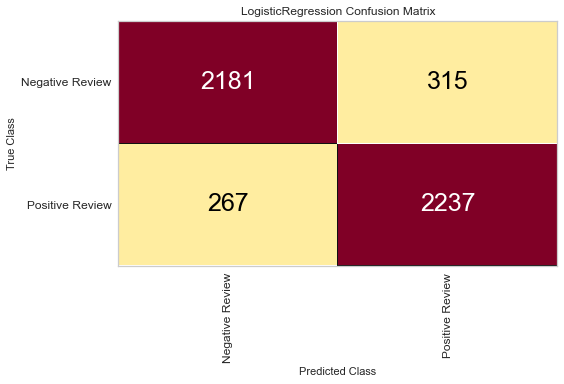

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
## Get model accuracy and create a confusion matrix

## create class labels for confusion matrix
## classes = ['Negative Review','Positive Review']
## Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.
label_encoder = {0: 'Negative Review', 1: 'Positive Review'}

## Initialize the confusion matrix
cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

## Fit the test set to the confusion matrix
cm.fit(x_test_vector, y_test)

## Creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

## Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

## Display the confusion matrix
cm.show()

#### 8. Get the precision, recall, and F1-score for the test set predictions

In [29]:
## Import matlab lib
import matplotlib.pyplot as plt

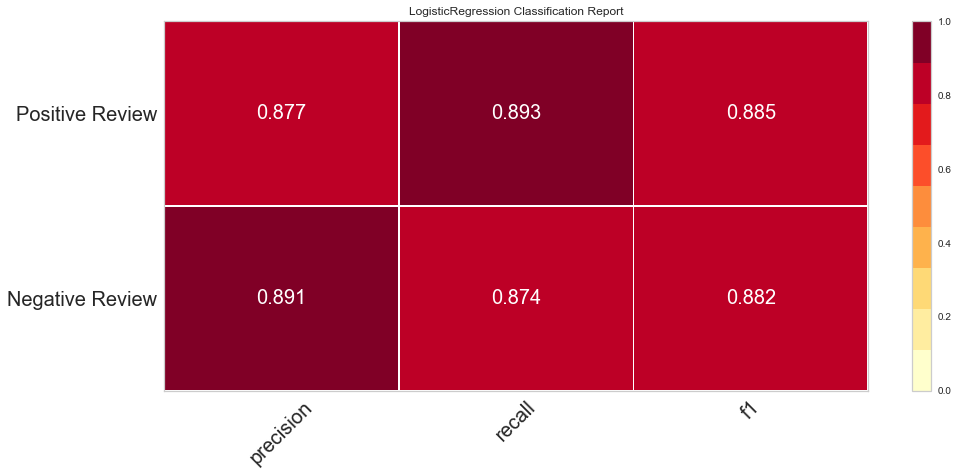

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [30]:
## Get precision, recall, and F1-score from the classification report
## Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

## Instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

## Fit the classification report to the test data
class_report.fit(x_train_vector, y_test)  

## Evaluate the model on the test data
class_report.score(x_test_vector, y_test)  
class_report.show()

#### 9. Create a ROC curve for the test set.

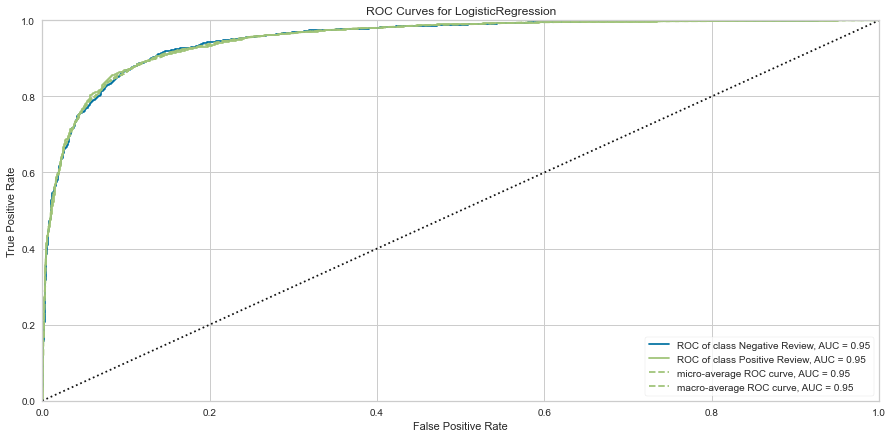

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
## ROC and AUC
## Instantiate the visualizer
roc_curve = ROCAUC(logreg_model, encoder = label_encoder, solver = 'liblinear')

## Fit the ROC curve to the test data
roc_curve.fit(x_test_vector, y_test)

## Evaluate the model on the test data
roc_curve.score(x_test_vector, y_test)  
roc_curve.show()

#### 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

I have chosen <b>Random Forest</b> classification model

In [32]:
## Import Random Forest regression model
from sklearn.ensemble import RandomForestClassifier

## Instantiate the Random Forest regression model 
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features=None, min_samples_leaf=30)

##### i. Train a classification regression model using the training data

In [33]:
## Fit the model to the training set
rfm.fit(x_train_vector, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=101)

##### ii. Find the model accuracy on test set and create a confusion matrix for the test set predictions.

Model Accuracy: 77.26%


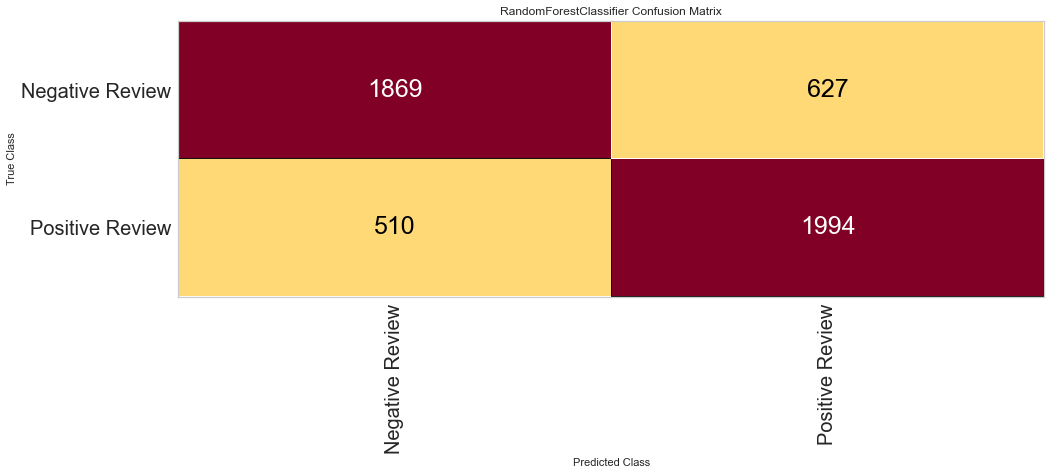

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
#get model accuracy and create a confusion matrix
#create class labels for confusion matrix
#classes = ['Negative Review','Positive Review']
# Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.
label_encoder = {0: 'Negative Review', 1: 'Positive Review'}

#initialize the confusion matrix
cm = ConfusionMatrix(rfm, encoder = label_encoder,  percent=False) #update model to rfm

#fit the test set to the confusion matrix
cm.fit(x_test_vector, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

##### iii. Get the precision, recall, and F1-score for the test set predictions.

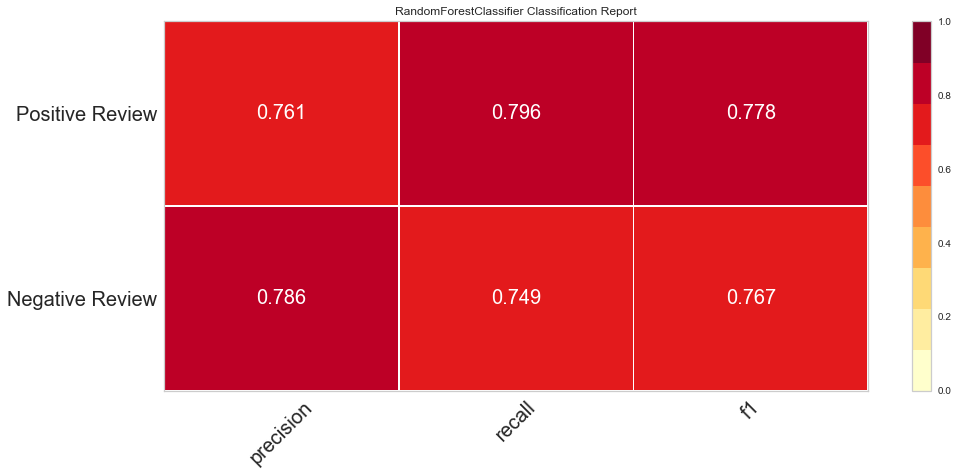

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [35]:
##get precision, recall, and F1-score from the classification report
##set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

##instantiate the classification report
class_report = ClassificationReport(rfm, encoder = label_encoder) #update model to rfm

##fit the classification report to the test data
class_report.fit(x_train_vector, y_test)  

##evaluate the model on the test data
class_report.score(x_test_vector, y_test)  
class_report.show()

##### iv. Create a ROC curve for the test set.

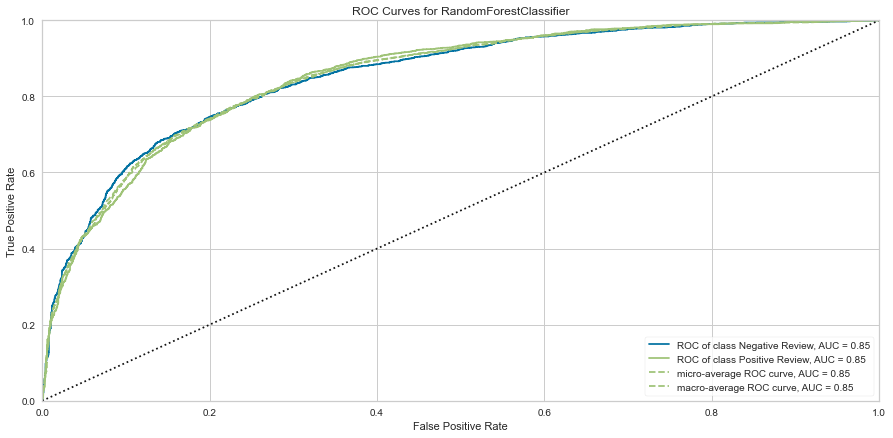

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(rfm, encoder = label_encoder, solver = 'liblinear')  #update model to rfm

#fit the ROC curve to the test data
roc_curve.fit(x_test_vector, y_test)

#evaluate the model on the test data
roc_curve.score(x_test_vector, y_test)  
roc_curve.show()